In [21]:
sizes = np.array([500, 1000, 3000, 5000, 8000, 10000, 13000])
gp_lps = np.array([129528.26, 259759.21, 774487.89, 1279649.33])


# gprf_200_13k on 2hrs = 3327644.45174
# local_800_13k on 2hrs = 3325794.84012
# local_200_13k on 2hrs = 3317605.47184
# 1hr times
local_200_lps = np.array([127884.884283, 255665.641027, 763819.809414, 1271737.15499, 2034017.35321, 2564019.75297, 3317605.47184])
local_800_lps = np.array([0, 257648.669397, 767620.337926, 1275314.15972, 2040386.31834, 2568436.68666, 3325794.84012])
gprf_200_lps = np.array([128675.360866, 258548.732528, 769294.116966, 1276335.32775, 2041375.00166, 2565388.95321, 3327644.45174])
gprf_800_lps = np.array([0, 258221.009079, 768442.850781, 1269143.05537, 2036961.69581, 2554468.1453, 3318547.71157])


# 1hr times
#local_200_lps = np.array([127884.884283, 255665.641027, 763819.809414, 1271737.15499, 2034017.35321, 2564019.75297, 3317605.93848])
#local_800_lps = np.array([0, 257648.669397, 767620.337926, 1275314.15972, 2040386.31834, 2568436.68666, 3325680.93594])
#gprf_200_lps = np.array([128675.360866, 258548.732528, 769294.116966, 1276335.32775, 2041375.00166, 2565388.95321, 3325563.26893])
#gprf_800_lps = np.array([0, 258221.009079, 768442.850781, 1269143.05537, 2036961.69581, 2554468.1453, 3318547.71157])

gprf_200_means = [14.3190862795, 15.8643902427, 9.38234572341, 18.8271234946 ]
gprf_200_medians = [3.29322360078, 4.60534750487, 3.32619343484,9.66541913757 ]

local_200_means = [24.5247654021, 30.2823290528, 24.6285625609, 26.2425328101,]
local_200_medians = [10.1088027444, 16.5818637424, 10.6668113659, 11.9297885518]

local_800_means = [0, 16.780540272, 13.5829818222, 24.7415119485]
local_800_medians = [0, 5.29786009213, 3.84680658542, 11.0542301907]

gprf_800_means = [0, 1.24961176726, 0.395202618443, 8.19599831388]
gprf_800_medians = [0, 0.419832115264, 0.252769868255, 5.52997582702]




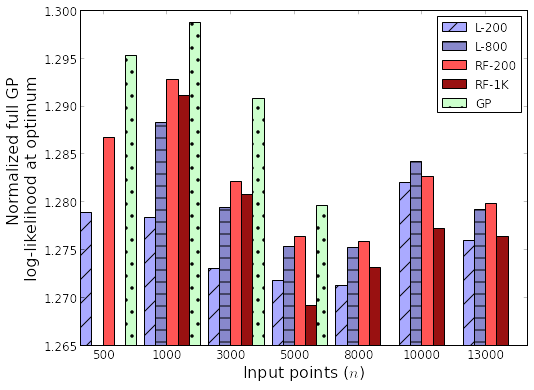

In [22]:
import numpy as np
import matplotlib.pyplot as plt

N = len(sizes)

nrf200 = gprf_200_lps / (sizes * 200)
nrf800 = gprf_800_lps / (sizes * 200)
nlg200 = local_200_lps / (sizes * 200)
nlg800 = local_800_lps / (sizes * 200)
ngp = gp_lps/ (sizes[:4 ]* 200)

ind = np.arange(N)*2  # the x locations for the groups
width = 0.35       # the width of the bars

matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

fig = plt.figure(figsize=((8,6)))
ax = fig.add_subplot(111)

rects0 = ax.bar(ind, nlg200, width, color="#AAAAFF", hatch='/')
rects1 = ax.bar(ind+width, nlg800, width, color="#8888CC", hatch='-')
rects2 = ax.bar(ind+2*width, nrf200, width, color="#FF5555")
rects3 = ax.bar(ind+3*width, nrf800, width,  color="#991111")
rects4 = ax.bar(ind[:4]+4*width, ngp, width, color="#CCFFCC", hatch='.')

ax.set_ylim([1.265, 1.3])

# add some text for labels, title and axes ticks
ax.set_ylabel('Normalized full GP\n log marginal likelihood at optimum', fontsize=16)
ax.set_xlabel('Input points ($n$)', fontsize=16)

ax.set_xticks(ind+2*width)
ax.set_xticklabels( [str(s) for s in sizes] )

ax.legend( (rects0[0], rects1[0], rects2[0], rects3[0], rects4[0]), ('L-200', 'L-800', 'RF-200', "RF-1K", 'GP') )

#def autolabel(rects):
#    # attach some text labels
#    for rect in rects:
#        height = rect.get_height()
#        ax.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%d'%int(height),
#                ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)




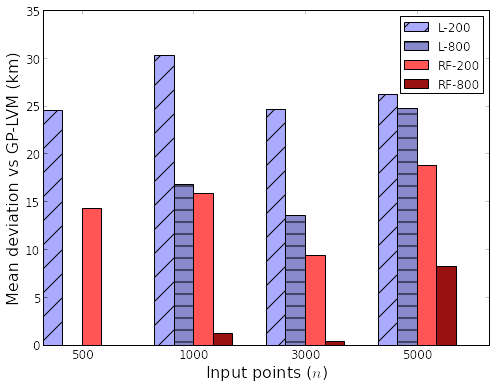

In [19]:

N = len(gprf_200_means)

ind = np.arange(N)*2  # the x locations for the groups
width = 0.35       # the width of the bars

matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

fig = plt.figure(figsize=((8,6)))
ax = fig.add_subplot(111)

rects0 = ax.bar(ind, local_200_means, width, color="#AAAAFF", hatch='/')
rects1 = ax.bar(ind+1*width, local_800_means, width, color="#8888CC", hatch='-')
rects2 = ax.bar(ind+2*width, gprf_200_means, width,  color="#FF5555")
rects3 = ax.bar(ind+3*width, gprf_800_means, width, color="#991111")


# add some text for labels, title and axes ticks
ax.set_ylabel('Mean deviation vs GP-LVM (km)', fontsize=16)
ax.set_xlabel('Input points ($n$)', fontsize=16)

ax.set_xticks(ind+2*width)
ax.set_xticklabels( [str(s) for s in sizes] )

ax.legend( (rects0[0], rects1[0], rects2[0], rects3[0]), ( 'L-200', "L-800", 'RF-200', 'RF-800' ))

#def autolabel(rects):
#    # attach some text labels
#    for rect in rects:
#        height = rect.get_height()
#        ax.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%d'%int(height),
#                ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)




[ 0.0335      0.0817528   0.0856414   0.00853815  0.01006976  0.00715542]
[ 0.0051      0.00623538  0.00469574  0.00379473  0.00464758  0.00626099]


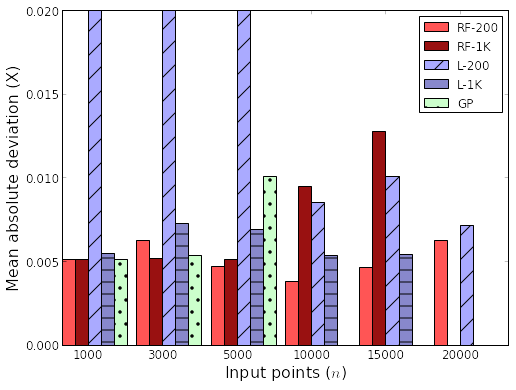

In [4]:
#### CRAZY LINES
sizes = np.array([1000, 3000, 5000, 10000, 15000, 20000] )
gprf_1000 = np.array([0.0051, 0.0030, 0.0023, 0.0030, 0.0033, 0]) * np.sqrt(sizes/1000)
#gprf_1000 = np.array([0.0051, 0.0030, 0.0023, 0, 0, 0]) * np.sqrt(sizes/1000)
local_1000 = np.array([0.0055, 0.0042, 0.0031, 0.0017, 0.0014, 0])* np.sqrt(sizes/1000)
gprf_200 = np.array([0.0051, 0.0036, 0.0021, 0.0012, 0.0012, 0.0014])* np.sqrt(sizes/1000)
local_200 = np.array([0.0335, 0.0472, 0.0383, 0.0027, 0.0026, 0.0016])* np.sqrt(sizes/1000)
gp = np.array([0.0051, 0.0031, 0.0045,0, 0, 0])* np.sqrt(sizes/1000)
print local_200
print gprf_200


import numpy as np
import matplotlib.pyplot as plt

N = len(sizes)

ind = np.arange(N)*2  # the x locations for the groups
width = 0.35       # the width of the bars

matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

fig = plt.figure(figsize=((8,6)))
ax = fig.add_subplot(111)

rects0 = ax.bar(ind, gprf_200, width, color="#FF5555")
rects1 = ax.bar(ind+width, gprf_1000, width,  color="#991111")
rects2 = ax.bar(ind+2*width, local_200, width, color="#AAAAFF", hatch='/')
rects3 = ax.bar(ind+3*width, local_1000, width, color="#8888CC", hatch='-')
rects4 = ax.bar(ind+4*width, gp, width, color="#CCFFCC", hatch='.')

ax.set_ylim([0, 0.02])

# add some text for labels, title and axes ticks
ax.set_ylabel('Mean absolute deviation (X)', fontsize=16)
ax.set_xlabel('Input points ($n$)', fontsize=16)

ax.set_xticks(ind+2*width)
ax.set_xticklabels( [str(s) for s in sizes] )

ax.legend( (rects0[0], rects1[0], rects2[0], rects3[0], rects4[0]), ('RF-200', 'RF-1K', 'L-200', "L-1K", 'GP') )

#def autolabel(rects):
#    # attach some text labels
#    for rect in rects:
#        height = rect.get_height()
#        ax.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%d'%int(height),
#                ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)




In [8]:
cY = np.load("../clusters/cluster_478_Y.npy")
print cY.shape

(6, 200)


In [15]:
D = np.load("../clusters/cluster_478_Data.npy")


In [18]:
print D[1, :]
print D[3, :]
from sigvisa.utils.geog import dist_km
print dist_km((9.08578000e+01,   5.37559000e+01), (9.12978000e+01,   5.38107000e+01))

[  4.75400000e+03   4.87671500e+06   9.08578000e+01   5.37559000e+01
   9.30000000e+00   1.90000000e+00   4.90000000e+01   1.00000000e+01
   1.50000000e+00]
[  9.34200000e+03   5.03871900e+06   9.12978000e+01   5.38107000e+01
   9.90000000e+00   8.00000000e-01   3.50000000e+01   1.00000000e+01
   1.50000000e+00]
29.5425431221


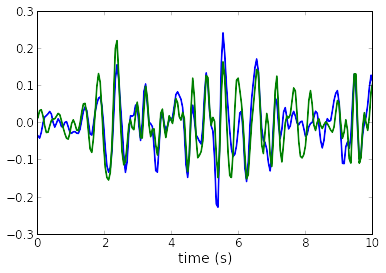

In [14]:
t = np.linspace(0, 10, 200)
plot(t, cY[1], lw=2)
plot(t, cY[3], lw=2)
xlabel("time (s)", fontsize=14)


[ 0.08340534  0.00853815  0.00968246  0.00715542]
[ 0.00469574  0.00379473  0.00426028  0.00357771]


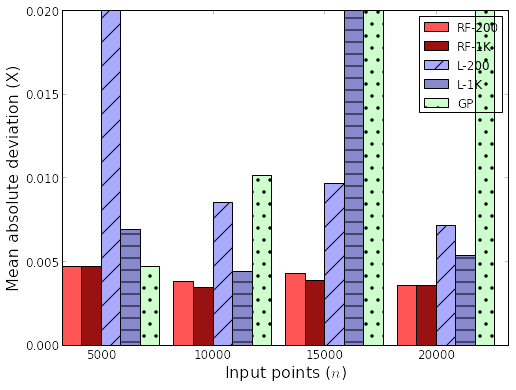

In [2]:
#### CRAZY LINES
sizes = np.array([5000, 10000, 15000, 20000] )
gprf_1000 = np.array([0.0021, 0.0011, 0.0010, 0.0008, ]) * np.sqrt(sizes/1000)
#gprf_1000 = np.array([0.0051, 0.0030, 0.0023, 0, 0, 0]) * np.sqrt(sizes/1000)
local_1000 = np.array([0.0031, 0.0014, 0.0996, 0.0012,])* np.sqrt(sizes/1000)
gprf_200 = np.array([0.0021, 0.0012, 0.0011, 0.0008,])* np.sqrt(sizes/1000)
local_200 = np.array([0.0373, 0.0027, 0.0025, 0.0016, ])* np.sqrt(sizes/1000)
gp = np.array([0.0021, 0.0032, 0.0054,0.0079,])* np.sqrt(sizes/1000)
print local_200
print gprf_200


import numpy as np
import matplotlib.pyplot as plt

N = len(sizes)

ind = np.arange(N)*2  # the x locations for the groups
width = 0.35       # the width of the bars

matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

fig = plt.figure(figsize=((8,6)))
ax = fig.add_subplot(111)

rects0 = ax.bar(ind, gprf_200, width, color="#FF5555")
rects1 = ax.bar(ind+width, gprf_1000, width,  color="#991111")
rects2 = ax.bar(ind+2*width, local_200, width, color="#AAAAFF", hatch='/')
rects3 = ax.bar(ind+3*width, local_1000, width, color="#8888CC", hatch='-')
rects4 = ax.bar(ind+4*width, gp, width, color="#CCFFCC", hatch='.')

ax.set_ylim([0, 0.02])

# add some text for labels, title and axes ticks
ax.set_ylabel('Mean absolute deviation (X)', fontsize=16)
ax.set_xlabel('Input points ($n$)', fontsize=16)

ax.set_xticks(ind+2*width)
ax.set_xticklabels( [str(s) for s in sizes] )

ax.legend( (rects0[0], rects1[0], rects2[0], rects3[0], rects4[0]), ('RF-200', 'RF-1K', 'L-200', "L-1K", 'GP') )

#def autolabel(rects):
#    # attach some text labels
#    for rect in rects:
#        height = rect.get_height()
#        ax.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%d'%int(height),
#                ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)


